<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [ ]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [ ]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [ ]:
# Task 1-1: use linear regression in sklearn
regr = linear_model.LinearRegression()

regr.fit(train_data,train_target)

housing_y_pred = regr.predict(test_data)



In [ ]:
# Task 1-2: show intercept and coefficents
print('Training Data:\n')
print(train_data)
print('Coefficients:\n',regr.coef_)


Training Data:

[[1.50234e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.49480e+02
  2.49100e+01]
 [6.27390e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.95620e+02
  8.47000e+00]
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 ...
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [1.11604e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.09850e+02
  2.32700e+01]
 [2.28760e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 7.08000e+01
  1.06300e+01]]
Coefficients:
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [ ]:
# Task 1-3: show errors on training dataset and testing dataset
print('Mean squared error: %.2f' %mean_squared_error(test_target,housing_y_pred))
print('Coefficient of determination: %.2f' %r2_score(test_target,housing_y_pred))


Mean squared error: 24.29
Coefficient of determination: 0.67


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [ ]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights

def myNormalEqualFun(X,y):
    Weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return Weights
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)


# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)
w2 = myNormalEqualFun(test_data_intercept,test_target)
my_pred_values = myPredictFun(test_data_intercept,w)
my_pred_values2 = myPredictFun(train_data_intercept,w2)

# Task 2-3: show intercept and coefficents
print('Doing Task 2-3')
print('Coefficients')
print(w)
print('Predicted Values with training data')
print(my_pred_values)



Doing Task 2-3
Coefficients
[[ 3.02467510e+01]
 [-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]
Predicted Values with training data
[[28.99672362]
 [36.02556534]
 [14.81694405]
 [25.03197915]
 [18.76987992]
 [23.25442929]
 [17.66253818]
 [14.34119   ]
 [23.01320703]
 [20.63245597]
 [24.90850512]
 [18.63883645]
 [-6.08842184]
 [21.75834668]
 [19.23922576]
 [26.19319733]
 [20.64773313]
 [ 5.79472718]
 [40.50033966]
 [17.61289074]
 [27.24909479]
 [30.06625441]
 [11.34179277]
 [24.16077616]
 [17.86058499]
 [15.83609765]
 [22.78148106]
 [14.57704449]
 [22.43626052]
 [19.19631835]
 [22.43383455]
 [25.21979081]
 [25.93909562]
 [17.70162434]
 [16.76911711]
 [16.95125411]
 [31.23340153]
 [20.13246729]
 [23.76579011]
 [24.6322925 ]
 [13.94204955]
 [32.25576301]
 [42.67251161]
 [17.32745046]
 [27.2761

In [ ]:
# Task 2-4: show errors on training dataset and testing dataset
print('Doing Task 2-4')
#Using the scikit MSE function
print('Mean Squared Error on testing data: %.2f'%mean_squared_error(test_target,my_pred_values))
print('Mean Squared Error on training data: %.2f'%mean_squared_error(train_target,my_pred_values2))

Doing Task 2-4
Mean Squared Error on testing data: 24.29
Mean Squared Error on training data: 30.08


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
  #returning a list
  cost_history = []
  features_row, features_col = X.shape
  # init theta with random values
  theta = np.random.rand(features_col,1)
  # grabbing the m from the features
  m = features_row
  # iterating to find the minimum
  for iteration in range(numItrs):
    gradients = 2/m * X.T.dot(X.dot(theta)-y)
    print(theta)
    cost_history.append(cost(myPredictFun(X,theta),y))
    theta = theta - learning_rate *gradients
  return theta,cost_history

# creating the cost function based on the MSE in class
def cost(pred,target):
  inner_data = np.power(pred - target,2)
  return np.sum(inner_data) / (2 *len(pred))

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  return X.dot(w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
# global variables to help make calls to the function easier
itr = 20
training_learning_rate = .1
testing_learning_rate = .1
# calling the function
w, loss = myGradientDescentFun(train_data_intercept,train_target,training_learning_rate,itr)
w2,loss2 = myGradientDescentFun(test_data_intercept,test_target,testing_learning_rate,itr)


[[0.01599564]
 [0.88689416]
 [0.60887183]
 [0.11569421]
 [0.63833763]
 [0.85456265]
 [0.05664575]
 [0.12757956]
 [0.61137527]
 [0.85856727]
 [0.8294745 ]
 [0.30701493]
 [0.41708763]
 [0.40730338]]
[[ 4.57210344]
 [-0.23074704]
 [ 1.27941256]
 [-1.1176577 ]
 [ 0.86810459]
 [-0.28988642]
 [ 1.54197162]
 [-0.76791036]
 [ 1.28956985]
 [-0.356915  ]
 [-0.52359277]
 [-0.84049624]
 [ 1.23195898]
 [-1.28984761]]
[[ 8.21698968]
 [-0.16674488]
 [ 0.83529928]
 [-0.76557444]
 [ 1.05530858]
 [ 0.07822034]
 [ 1.98225571]
 [-0.32515775]
 [ 0.59407795]
 [-0.0788223 ]
 [-0.30082217]
 [-0.9534848 ]
 [ 1.10168583]
 [-1.46378794]]
[[11.13289868]
 [-0.30014623]
 [ 0.69471931]
 [-0.76106124]
 [ 1.14399031]
 [ 0.06965385]
 [ 2.45119902]
 [-0.24099228]
 [ 0.29937128]
 [-0.0904889 ]
 [-0.37734565]
 [-1.17381729]
 [ 1.15134936]
 [-1.84361408]]
[[ 1.34656259e+01]
 [-3.61783153e-01]
 [ 5.47127937e-01]
 [-7.00232395e-01]
 [ 1.18286320e+00]
 [ 9.31294828e-02]
 [ 2.77431432e+00]
 [-1.41926338e-01]
 [ 9.39114982e-03]

In [ ]:
# Task 3-3: show intercept and coefficents
print('Intercept for training data')
print(w[0])
print('Weights for training data')
print(w)
print('Intercept for testing data')
print(w2[0])
print('Weights for testing data')
print(w2)
my_pred_values_test = myPredictFun(test_data_intercept,w)
my_pred_values_train = myPredictFun(train_data_intercept,w2)

Intercept for training data
[22.53389292]
Weights for training data
[[22.53389292]
 [-0.69558564]
 [ 0.15414269]
 [-0.34028163]
 [ 0.83188637]
 [-0.63228173]
 [ 3.60693192]
 [-0.1253856 ]
 [-1.66575409]
 [ 0.56737287]
 [-0.41175974]
 [-1.72104118]
 [ 1.17270772]
 [-3.35421888]]
Intercept for testing data
[21.88431196]
Weights for testing data
[[21.88431196]
 [-1.10485017]
 [ 2.5743198 ]
 [-0.63746589]
 [ 0.7656879 ]
 [-1.67556367]
 [ 1.46072382]
 [-0.72029421]
 [-2.70961118]
 [ 1.88347326]
 [-0.6918703 ]
 [-1.12895727]
 [ 0.38588768]
 [-2.75891002]]


In [ ]:
# Task 3-4: show errors on training dataset and testing dataset
print('Mean squared error on testing data: %.2f' %cost(test_target,my_pred_values_test))
print('Mean squared error on training data: %.2f' %cost(train_target,my_pred_values_train))

Mean squared error on testing data: 13.57
Mean squared error on training data: 15.92


iterations
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
loss
[319.165885980987, 189.49674777876095, 124.36781785483336, 83.70036150512219, 57.82418203833382, 41.30463277733341, 30.7345304328695, 23.955402603447006, 19.595969738429684, 16.7833614009679, 14.961074747846284, 13.773824651274197, 12.994514895341831, 12.477824832012072, 12.130660690057386, 11.893317123414263, 11.727452949817648, 11.608408742033136, 11.520294325619723, 11.452845136740011]


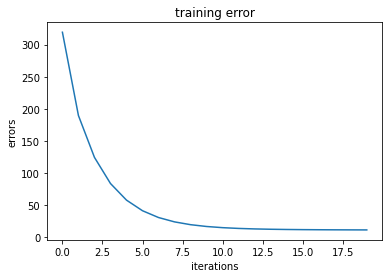

In [ ]:
# Task 3-5: plot learning curves showing training errors and testing errors along iterations
iterations = list(range(itr))
print('iterations')
print(iterations)
print('loss')
print(loss)
plt.title('training error')
plt.xlabel('iterations')
plt.ylabel('errors')
plt.plot(iterations,loss)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[319.165885980987, 189.49674777876095, 124.36781785483336, 83.70036150512219, 57.82418203833382, 41.30463277733341, 30.7345304328695, 23.955402603447006, 19.595969738429684, 16.7833614009679, 14.961074747846284, 13.773824651274197, 12.994514895341831, 12.477824832012072, 12.130660690057386, 11.893317123414263, 11.727452949817648, 11.608408742033136, 11.520294325619723, 11.452845136740011]


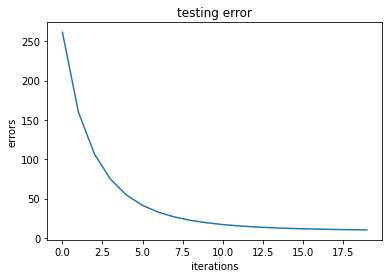

In [ ]:
iterations = list(range(itr))
print(iterations)
print(loss)
plt.title('testing error')
plt.xlabel('iterations')
plt.ylabel('errors')
plt.plot(iterations,loss2)
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing stochastic gradient descent
# Inputs: Training data, training label, learning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    features_x ,features_y =X.shape
    print(features_x)
    print(features_y) 

    m = features_x
    theta = np.random.randn(features_y,1)
    cost_history = []


    for epoch in range(epoches):
      for i in range(m):
        cost_history.append(cost(y,myPredictFun(X,theta)))
        random_index = np.random.randint(m)
        x_i = X[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta)-y_i)
        learning_rate = learning_schedule(epoch*m+i)
        theta = theta - learning_rate * gradients
    return theta,cost_history


def cost(pred,target):
  inner_data = np.power(pred - target,2)
  return np.sum(inner_data) / (2 *len(pred))

def learning_schedule(t):
  t_zero, t_one = 5,50
  return t_zero/(t+t_one)

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations

# variables to make calling the functions easier 
training_learning_rate,training_epoches,training_batch_size = .1,200,20000
testing_learning_rate, testing_epoches, testing_batch_size = .1,200,20000
# calls to the function twice with two different variables
w, loss = myGradientDescentFun(train_data_intercept,train_target,training_learning_rate,training_epoches,training_batch_size)
w2, loss2 = myGradientDescentFun(test_data_intercept, test_target , testing_learning_rate,testing_epoches,testing_batch_size)

# grabbing the target values for the training and test values
training_pred_values = myPredictFun(train_data_intercept,w)
test_pred_values = myPredictFun(test_data_intercept,w2)

# Task 4-3: show intercept and coefficents
print('Intercept for training data')
print(w[0])
print('weights for training data')
print(w)
print('Intercept for training data')
print(w2[0])
print('weights for testing data')
print(w2)

404
14
102
14
Intercept for training data
[22.77993736]
weights for training data
[[22.77993736]
 [-0.78785978]
 [ 0.12590207]
 [-0.62994864]
 [ 0.87458791]
 [-1.93755548]
 [ 3.46431413]
 [-0.22821949]
 [-2.94156387]
 [-0.65997428]
 [ 1.4601199 ]
 [-1.91480899]
 [ 1.03347265]
 [-3.48521092]]
Intercept for training data
[22.88171112]
weights for testing data
[[22.88171112]
 [-1.00223757]
 [ 2.46105102]
 [-3.68192735]
 [ 1.10850384]
 [-1.54965915]
 [ 1.32239544]
 [-1.09695584]
 [-4.91362561]
 [-1.84978051]
 [ 4.55369387]
 [-2.32152751]
 [-0.0608033 ]
 [-3.09873679]]


In [ ]:
# Task 4-4: show errors on training dataset and testing dataset
print('Mean squared error on testing data: %.2f' %cost(test_target,test_pred_values))
print('Mean squared error on testing data: %.2f' %cost(train_target,training_pred_values))

Mean squared error on testing data: 11.38
Mean squared error on testing data: 11.47


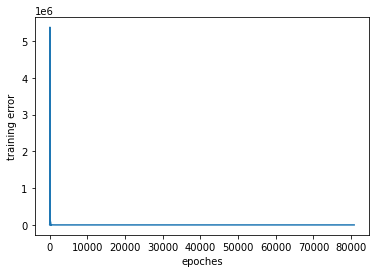

In [ ]:
# Task 4-5: plot learning curves showing training errors and testing errors along bath
# graphing training data
list_of_training_epoches = list(range(len(loss)))
plt.xlabel('epoches')
plt.ylabel('training error')
plt.plot(list_of_training_epoches,loss)
plt.show()

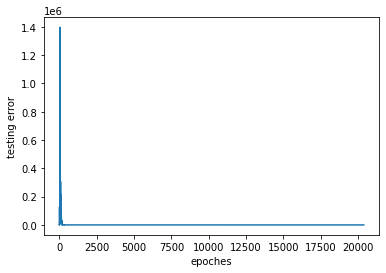

In [ ]:
# graphing testing data
list_of_testing_epoches = list(range(len(loss2)))
plt.xlabel('epoches')
plt.ylabel('testing error')
plt.plot(list_of_testing_epoches,loss2)
plt.show()